In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import tensorflow as tf


In [0]:
import keras 
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
mnist_data = tf.keras.datasets.fashion_mnist
(train_data , train_label),(test_data,test_label) = mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


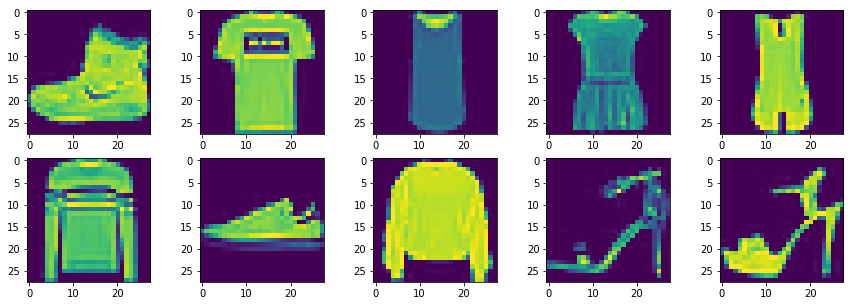

In [0]:
fig , axes = plt.subplots(nrows = 2 ,ncols= 5 , figsize=(15,5))
ax = axes.ravel()
for i in range(10):
  ax[i].imshow(train_data[i])
plt.show()

In [0]:
train_data = train_data.reshape(60000,28,28,1)
test_data =test_data.reshape(10000,28,28,1)

In [0]:
train_data = train_data/255.0
test_data = test_data/255.0

In [0]:
#Implementing the Model
model = Sequential()
model.add(keras.layers.BatchNormalization(axis = 3))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.BatchNormalization(axis = 3))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.BatchNormalization(axis = 3))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.BatchNormalization(axis = 3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [0]:
t1 = time()
history = model.fit(train_data,train_label,epochs = 25,validation_split=0.33)
t2 =time()

Train on 40199 samples, validate on 19801 samples
Epoch 1/25
40199/40199 [==============================] - 10s 243us/step - loss: 0.1769 - acc: 0.9343 - val_loss: 0.3230 - val_acc: 0.8948
Epoch 2/25
40199/40199 [==============================] - 10s 240us/step - loss: 0.1671 - acc: 0.9379 - val_loss: 0.3313 - val_acc: 0.8918
Epoch 3/25
40199/40199 [==============================] - 9s 235us/step - loss: 0.1616 - acc: 0.9406 - val_loss: 0.3259 - val_acc: 0.8936
Epoch 4/25
40199/40199 [==============================] - 9s 236us/step - loss: 0.1506 - acc: 0.9445 - val_loss: 0.3595 - val_acc: 0.8915
Epoch 5/25
40199/40199 [==============================] - 9s 236us/step - loss: 0.1432 - acc: 0.9461 - val_loss: 0.3903 - val_acc: 0.8835
Epoch 6/25
40199/40199 [==============================] - 10s 237us/step - loss: 0.1369 - acc: 0.9484 - val_loss: 0.4024 - val_acc: 0.8756
Epoch 7/25
40199/40199 [==============================] - 9s 236us/step - loss: 0.1307 - acc: 0.9506 - val_loss: 0.3548

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 5, 5, 64)          256       
__________

In [0]:
print("\nTraining wall clock time: {} seconds\n".format(round(t2-t1,3)))



Training wall clock time: 238.523 seconds



In [0]:
test_loss = model.evaluate(test_data, test_label)
print("\nTest accuracy: ",test_loss[1])

10000/10000 [==============================] - 1s 75us/step

Test accuracy:  0.8814


In [0]:
acc =history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

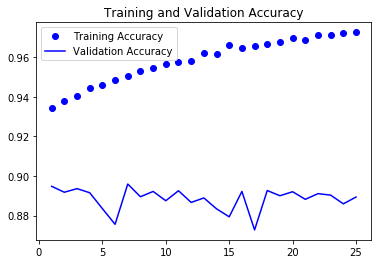

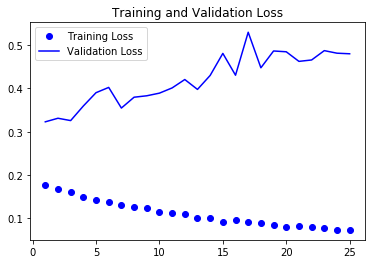

In [0]:
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b',label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label = 'Training Loss')
plt.plot(epochs,val_loss,'b',label= 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [0]:
#Lets try to get a better model accuracy
model = Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))

W0805 13:54:16.068799 140673766913920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 13:54:16.123116 140673766913920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 13:54:16.135974 140673766913920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 13:54:16.182816 140673766913920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

t1=time()
model.fit(train_data, train_label, epochs=5)
t2=time()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


W0805 13:55:39.570533 140673766913920 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0805 13:55:39.712193 140673766913920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
60000/60000 [==============================] - 22s 373us/step - loss: 0.3970 - acc: 0.8611
Epoch 2/5
60000/60000 [==============================] - 19s 316us/step - loss: 0.2689 - acc: 0.9036
Epoch 3/5
60000/60000 [==============================] - 19s 317us/step - loss: 0.2219 - acc: 0.9184
Epoch 4/5
60000/60000 [==============================] - 19s 322us/step - loss: 0.1869 - acc: 0.9314
Epoch 5/5
60000/60000 [==============================] - 19s 318us/step - loss: 0.1604 - acc: 0.9408


In [0]:
test_loss = model.evaluate(test_data, test_label)
print("\nTest accuracy: ",test_loss[1])

10000/10000 [==============================] - 1s 139us/step

Test accuracy:  0.9118
